# Random Forest Assignment: Company data


About the data: 
Let’s consider a Company dataset with around 10 variables and 400 records. 
The attributes are as follows: 

- Sales -- Unit sales (in thousands) at each location
 
- Competitor Price -- Price charged by competitor at each location

- Income -- Community income level (in thousands of dollars)

- Advertising -- Local advertising budget for company at each location (in thousands of dollars)

- Population -- Population size in region (in thousands)

- Price -- Price company charges for car seats at each site

- Shelf Location at stores -- A factor with levels Bad, Good and Medium indicating the quality of the shelving location for the car seats at each site

- Age -- Average age of the local population

- Education -- Education level at each location

- Urban -- A factor with levels No and Yes to indicate whether the store is in an urban or rural location

- US -- A factor with levels No and Yes to indicate whether the store is in the US or not

 
Problem Statement:

A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 
Approach - A random forest can be built with target variable Sale (we will first convert it in categorical variable) & all other variable will be independent in the analysis.  


In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

Now, that we have imported the libraries, we would get the data and take a look at it.

In [2]:
comp_data = pd.read_csv('Company_Data.csv')

In [3]:
comp_data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [4]:
comp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [5]:
comp_data.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [6]:
comp_data.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

So, we had a baisc overview of the data, now we wants to look at the data more closely and see how different columns are related to one another.


# EDA

In [7]:
import warnings
warnings.filterwarnings("ignore", "is_categorical_dtype")
warnings.filterwarnings("ignore", "use_inf_as_na")

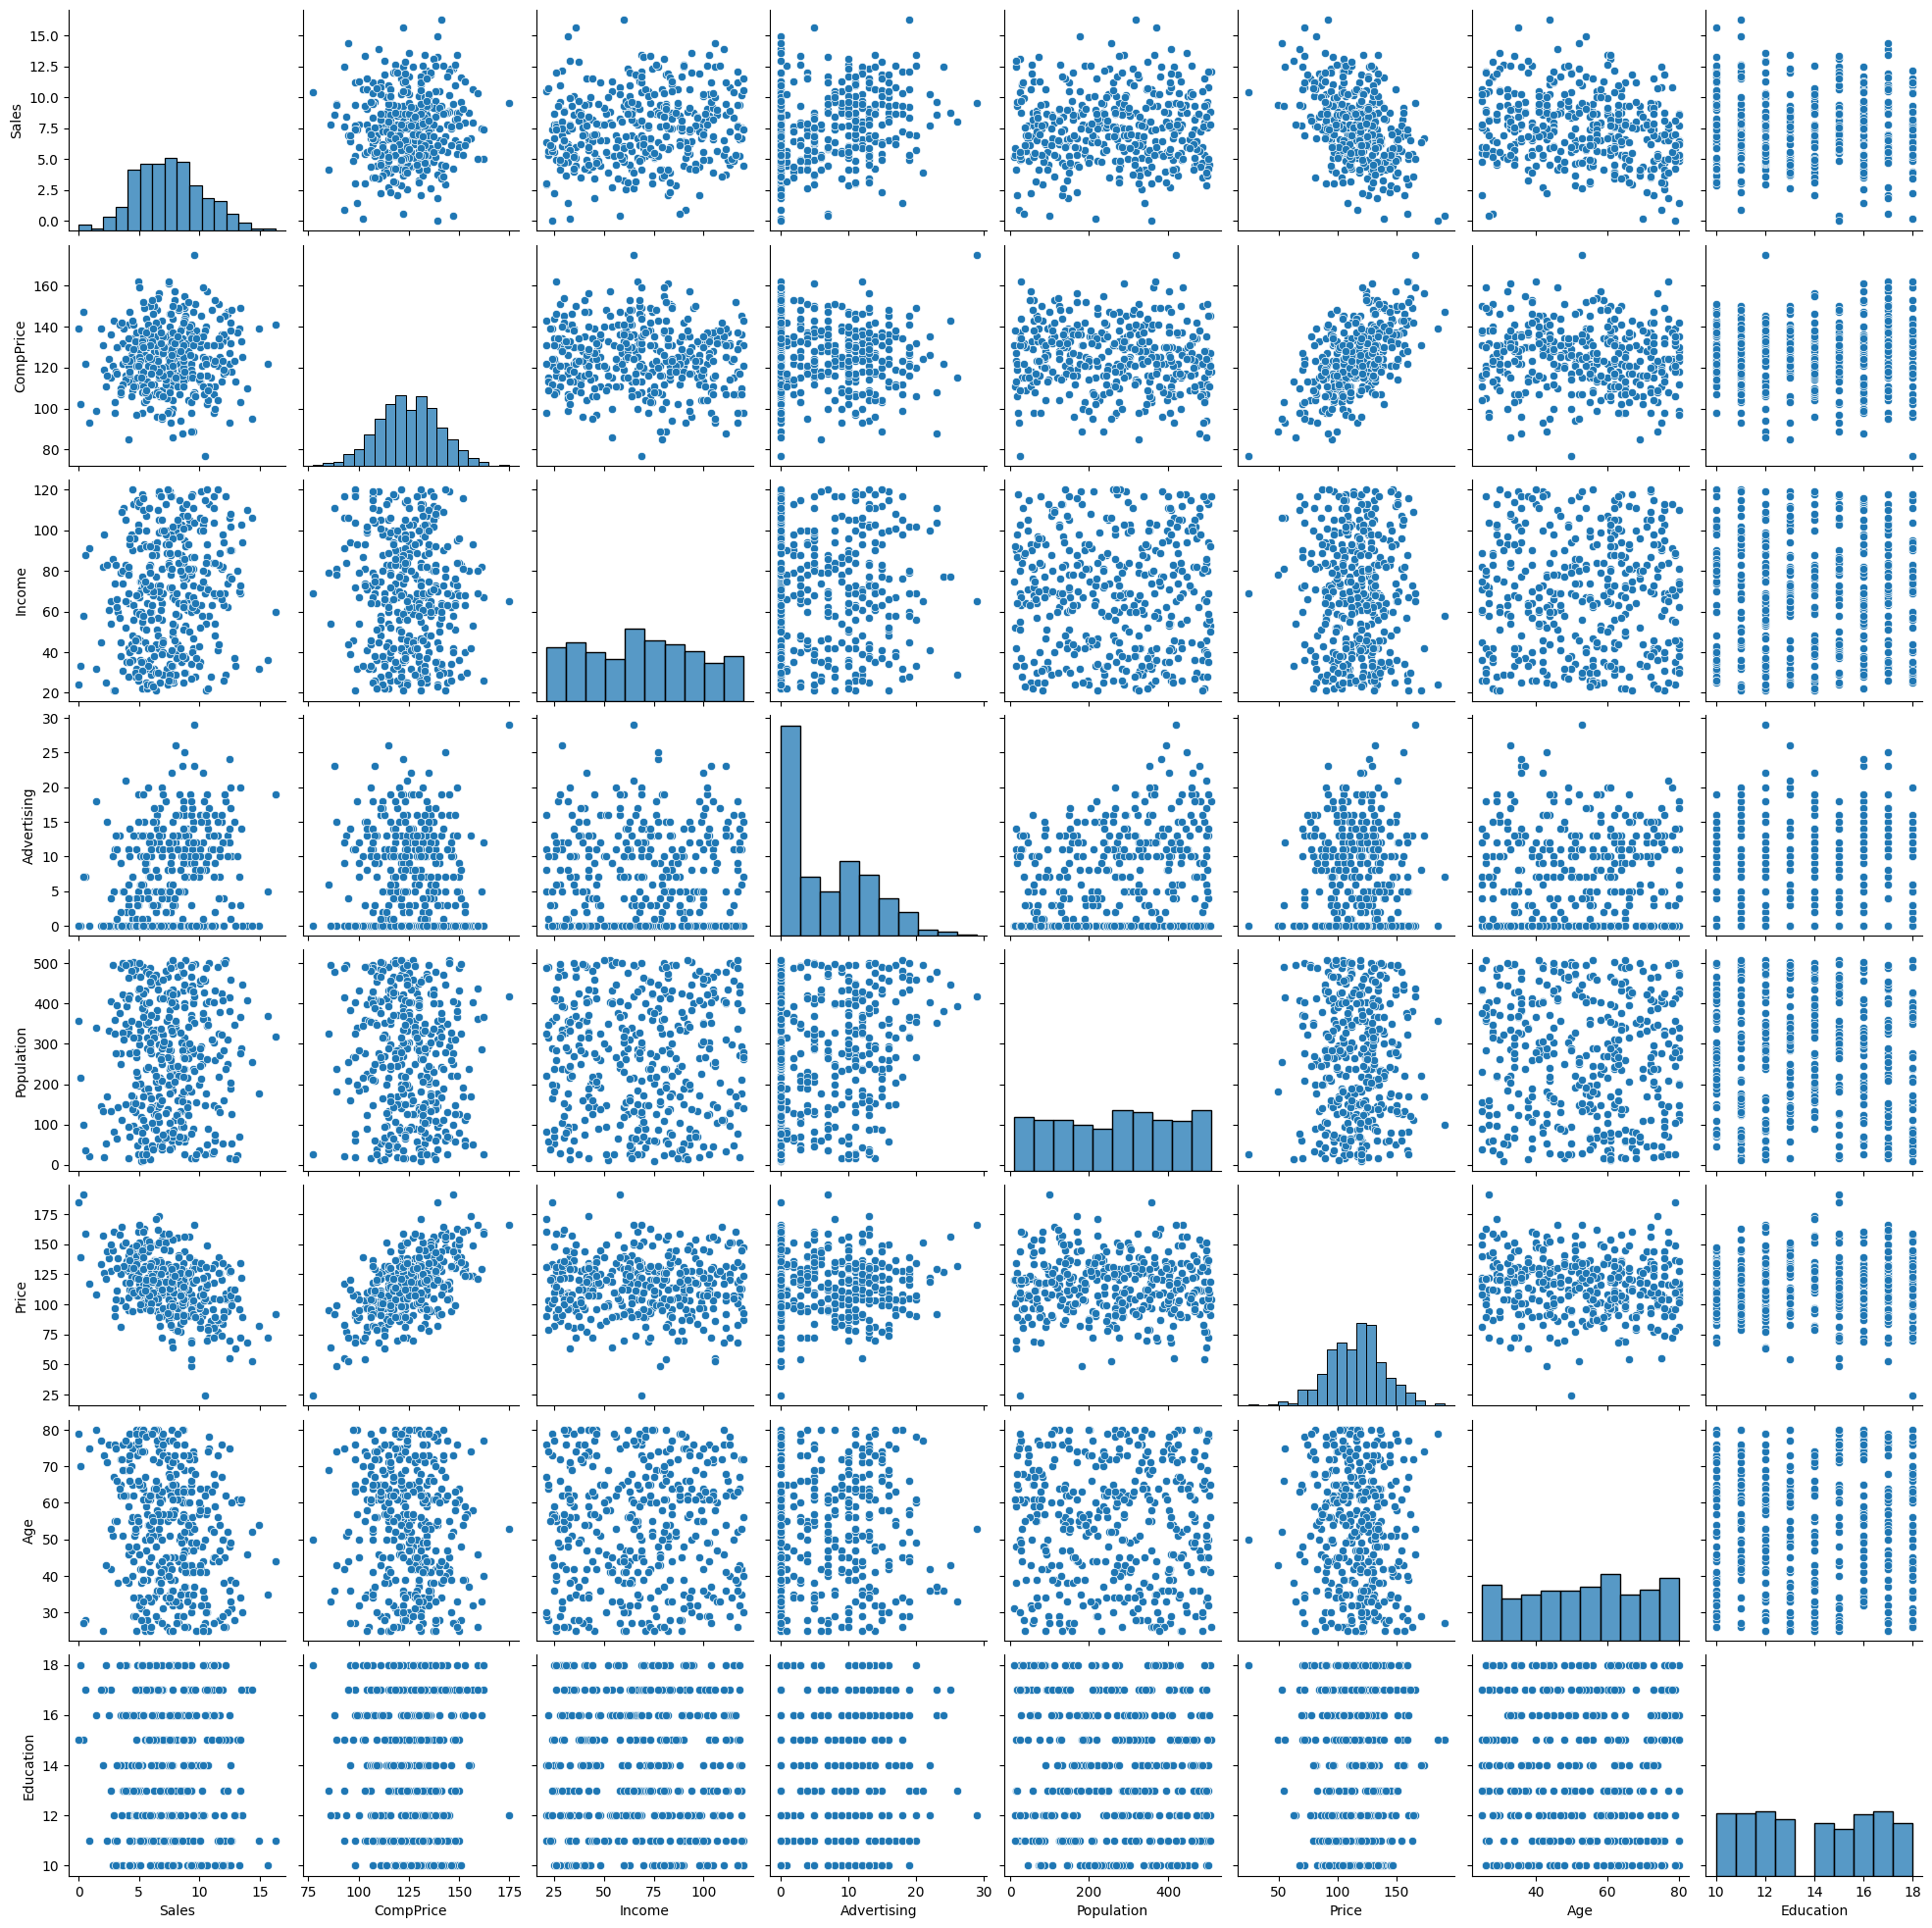

In [8]:
sns.pairplot(comp_data)
plt.show()

In [9]:
numeric_features = comp_data.describe(include = ['int64', 'float64']).columns
numeric_features

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'Age', 'Education'],
      dtype='object')

<Axes: >

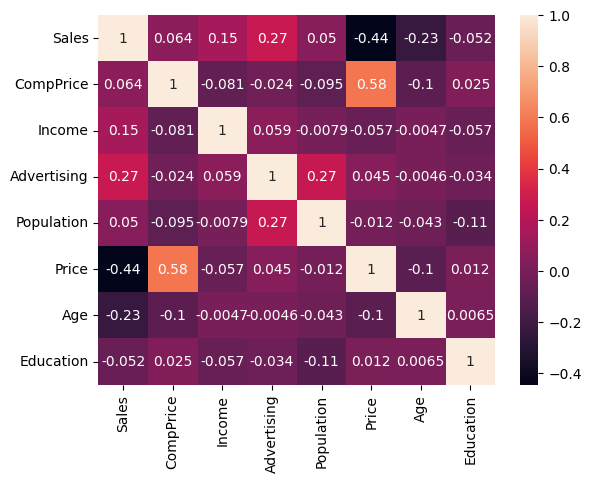

In [10]:
sns.heatmap(comp_data[numeric_features].corr(), annot = True)

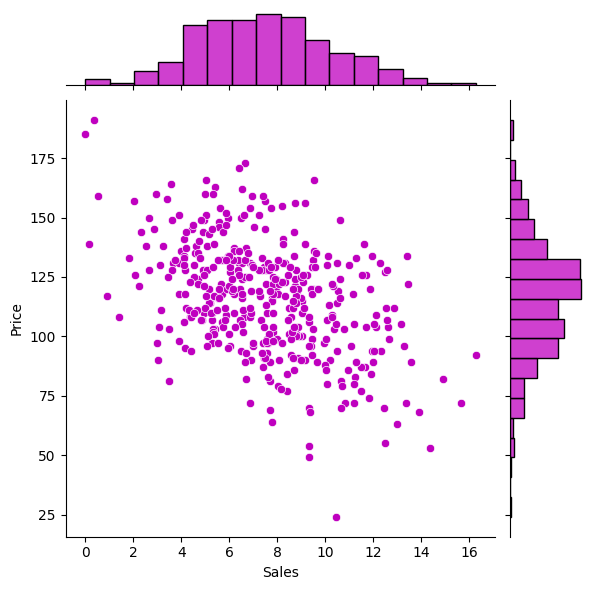

In [11]:
sns.jointplot(x = 'Sales', y = 'Price', data = comp_data, color = 'm')

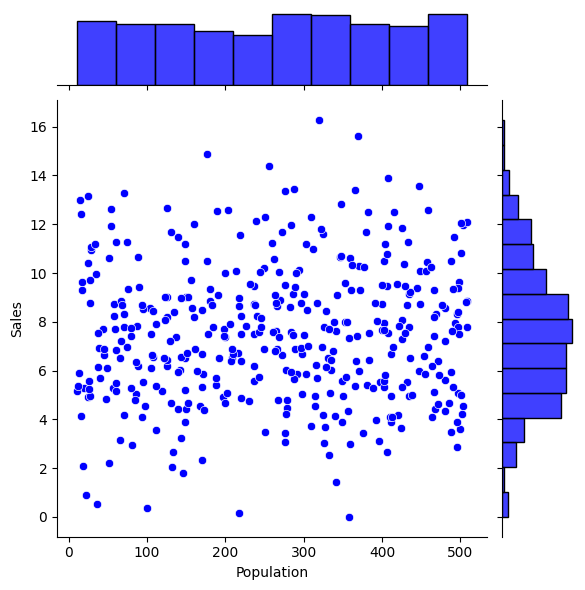

In [12]:
sns.jointplot(x = 'Population', y = 'Sales', data = comp_data, color = 'b')

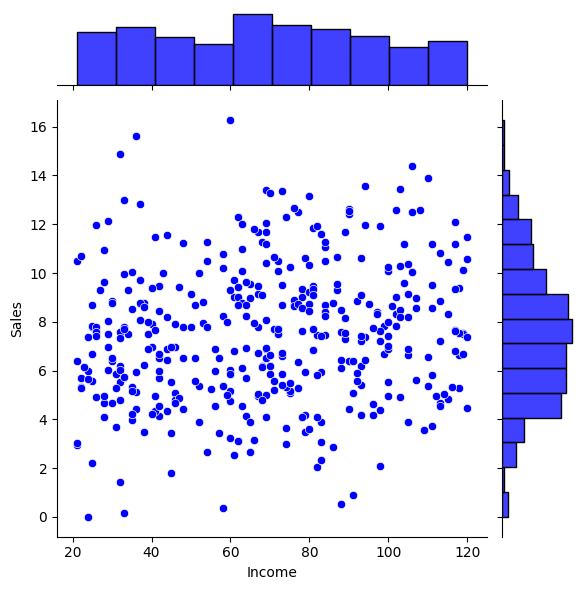

In [13]:
sns.jointplot(x = 'Income', y = 'Sales', data = comp_data, color = 'b')

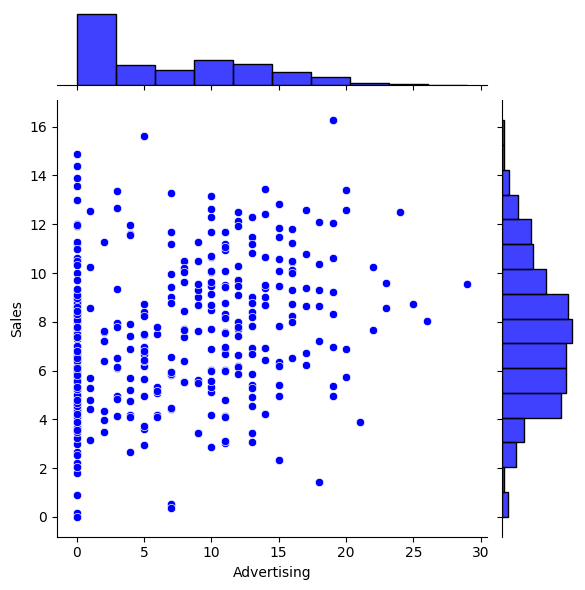

In [14]:
sns.jointplot(x = 'Advertising', y = 'Sales', data = comp_data, color = 'b')

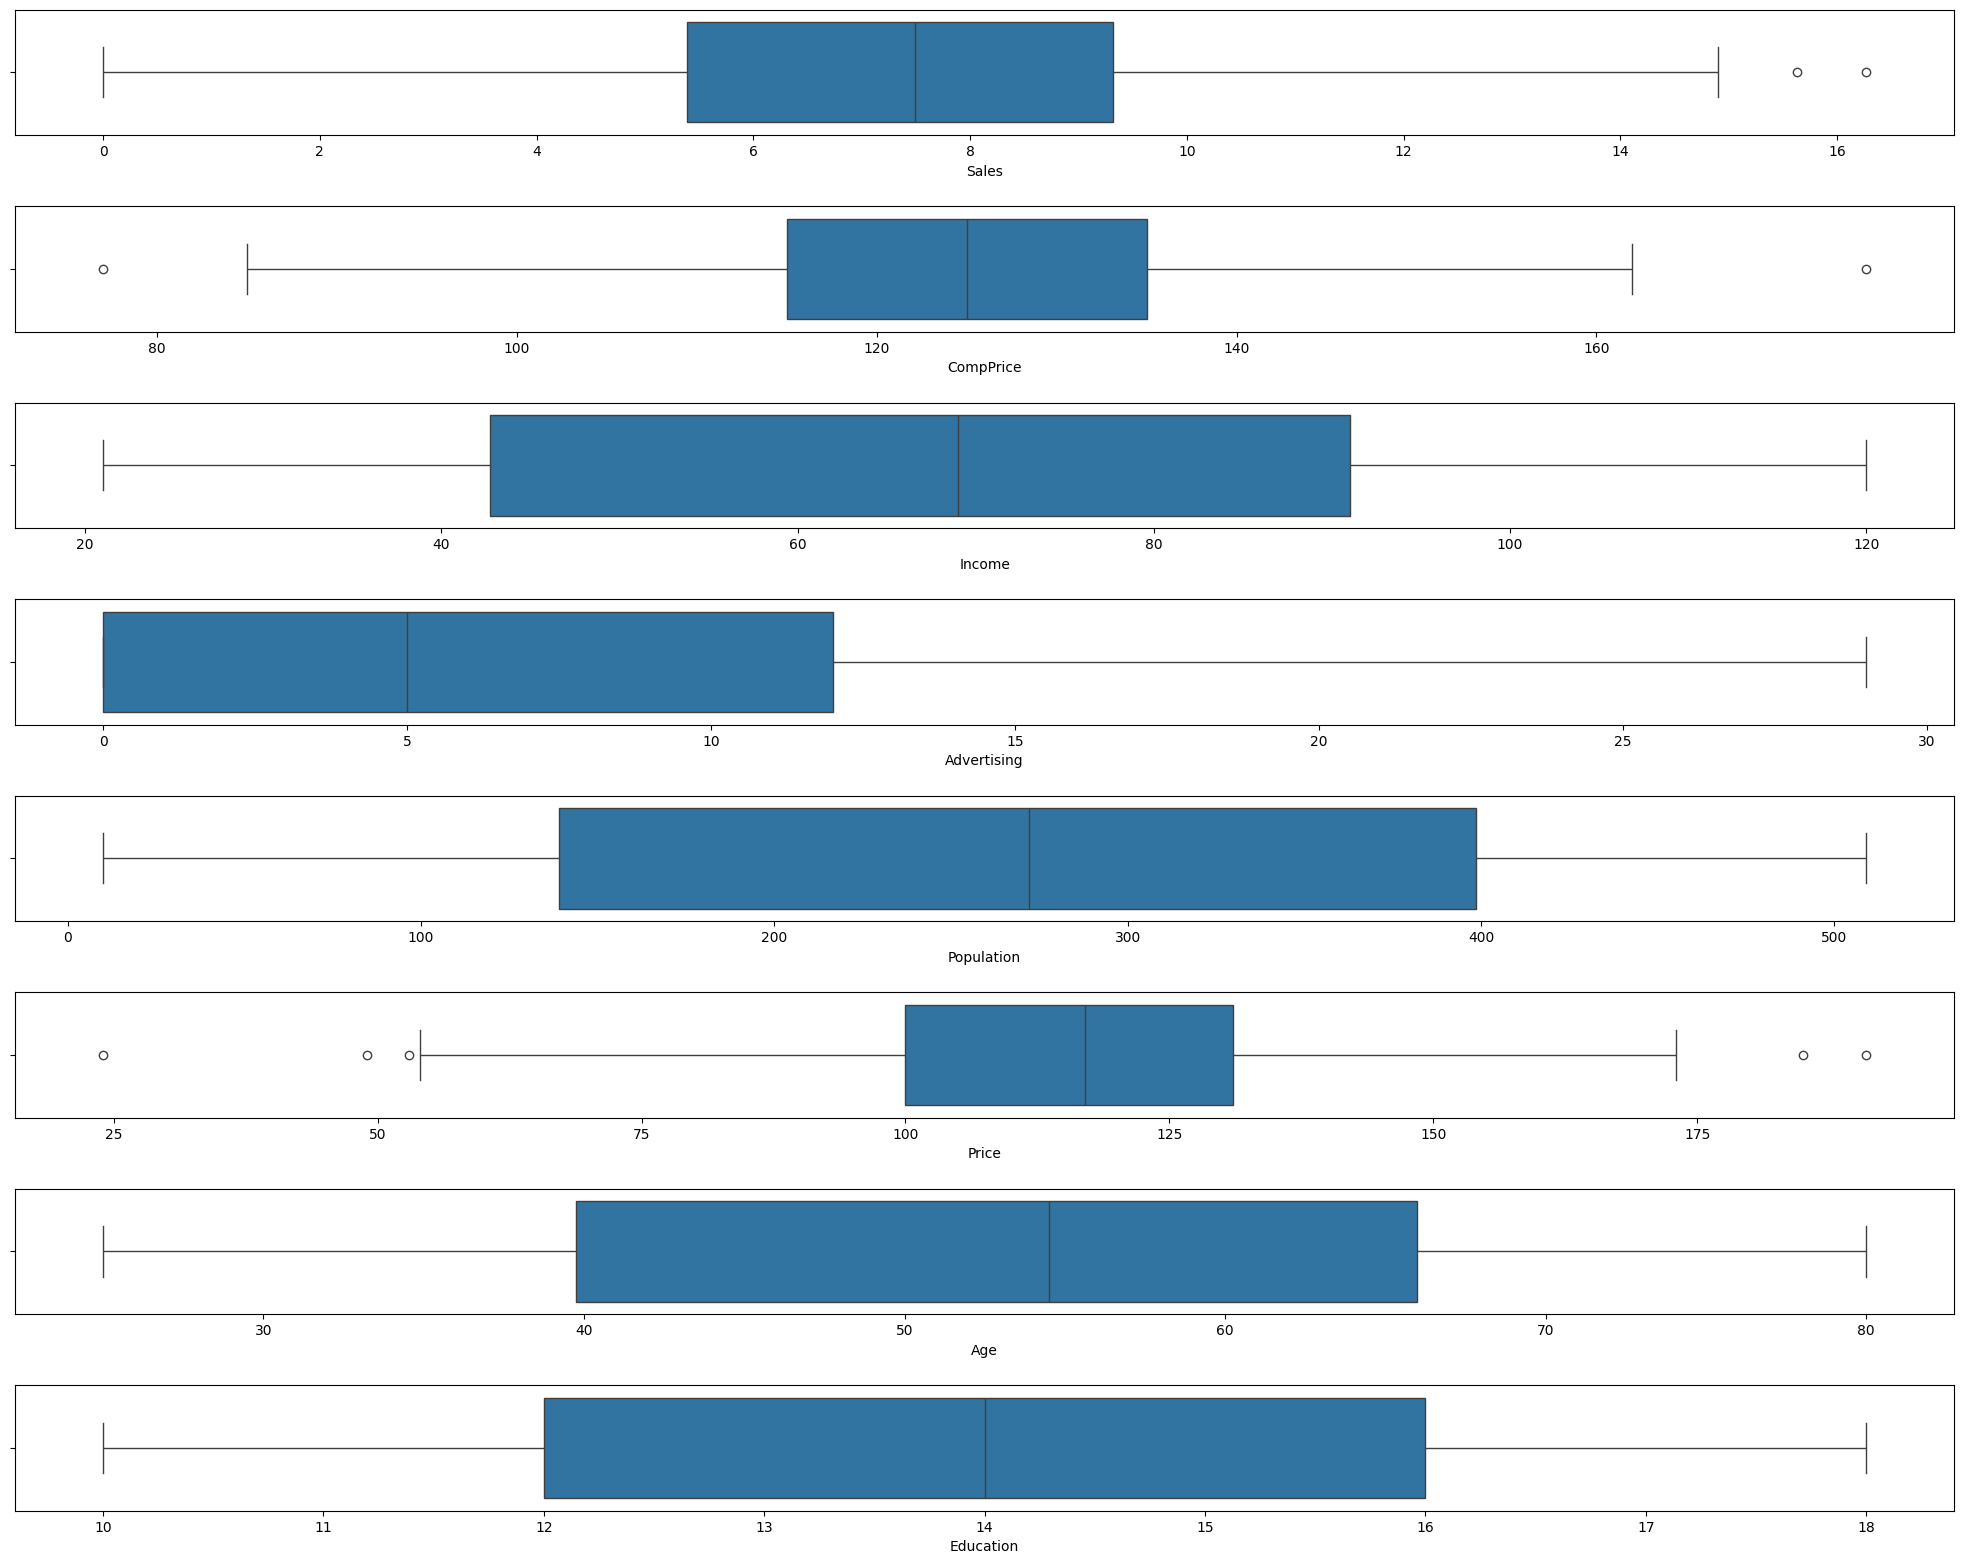

In [15]:
fig, axes = plt.subplots(8,1,figsize = (20,16), sharex = False, sharey = False)
sns.boxplot(x = 'Sales', data = comp_data, ax = axes[0])
sns.boxplot(x = 'CompPrice', data = comp_data, ax = axes[1])
sns.boxplot(x = 'Income', data = comp_data, ax = axes[2])
sns.boxplot(x = 'Advertising', data = comp_data, ax = axes[3])
sns.boxplot(x = 'Population', data = comp_data, ax = axes[4])
sns.boxplot(x = 'Price', data = comp_data, ax = axes[5])
sns.boxplot(x = 'Age', data = comp_data, ax = axes[6])
sns.boxplot(x = 'Education', data = comp_data, ax = axes[7])
plt.tight_layout(pad = 2.0)
plt.show()

# Feature Enginnering

We need to change the continous variable of Sales into categorical variable.

In [16]:
comp_data.Sales.describe()

count    400.000000
mean       7.496325
std        2.824115
min        0.000000
25%        5.390000
50%        7.490000
75%        9.320000
max       16.270000
Name: Sales, dtype: float64

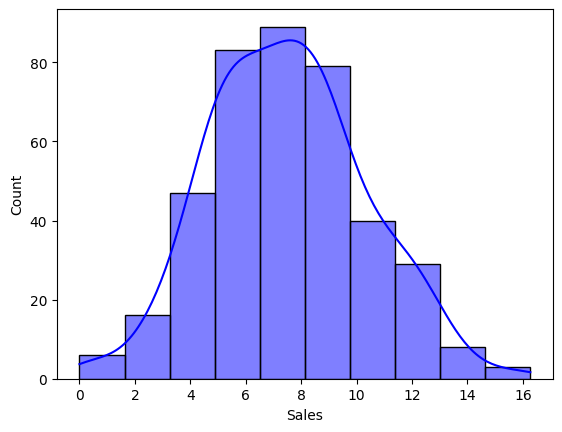

In [17]:
sns.histplot(comp_data['Sales'], bins = 10, kde = True, color = 'blue')
plt.show()

In [18]:
max = comp_data.Sales.max()
max

16.27

In [19]:
max/3 

5.423333333333333

In [20]:
(max/3)*2

10.846666666666666

In [21]:
(max/3)*3

16.27

In [22]:
df = comp_data.copy()
df['Sales_cat'] = pd.cut(x = df['Sales'], bins = [0, 5.39, 10.84, 17], labels = ['Low','Medium','High'], right = False)
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_cat
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,Medium
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,High
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,Medium
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,Medium
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,Low


In [23]:
df.Sales_cat.value_counts()

Sales_cat
Medium    249
Low       100
High       51
Name: count, dtype: int64

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Sales        400 non-null    float64 
 1   CompPrice    400 non-null    int64   
 2   Income       400 non-null    int64   
 3   Advertising  400 non-null    int64   
 4   Population   400 non-null    int64   
 5   Price        400 non-null    int64   
 6   ShelveLoc    400 non-null    object  
 7   Age          400 non-null    int64   
 8   Education    400 non-null    int64   
 9   Urban        400 non-null    object  
 10  US           400 non-null    object  
 11  Sales_cat    400 non-null    category
dtypes: category(1), float64(1), int64(7), object(3)
memory usage: 35.0+ KB


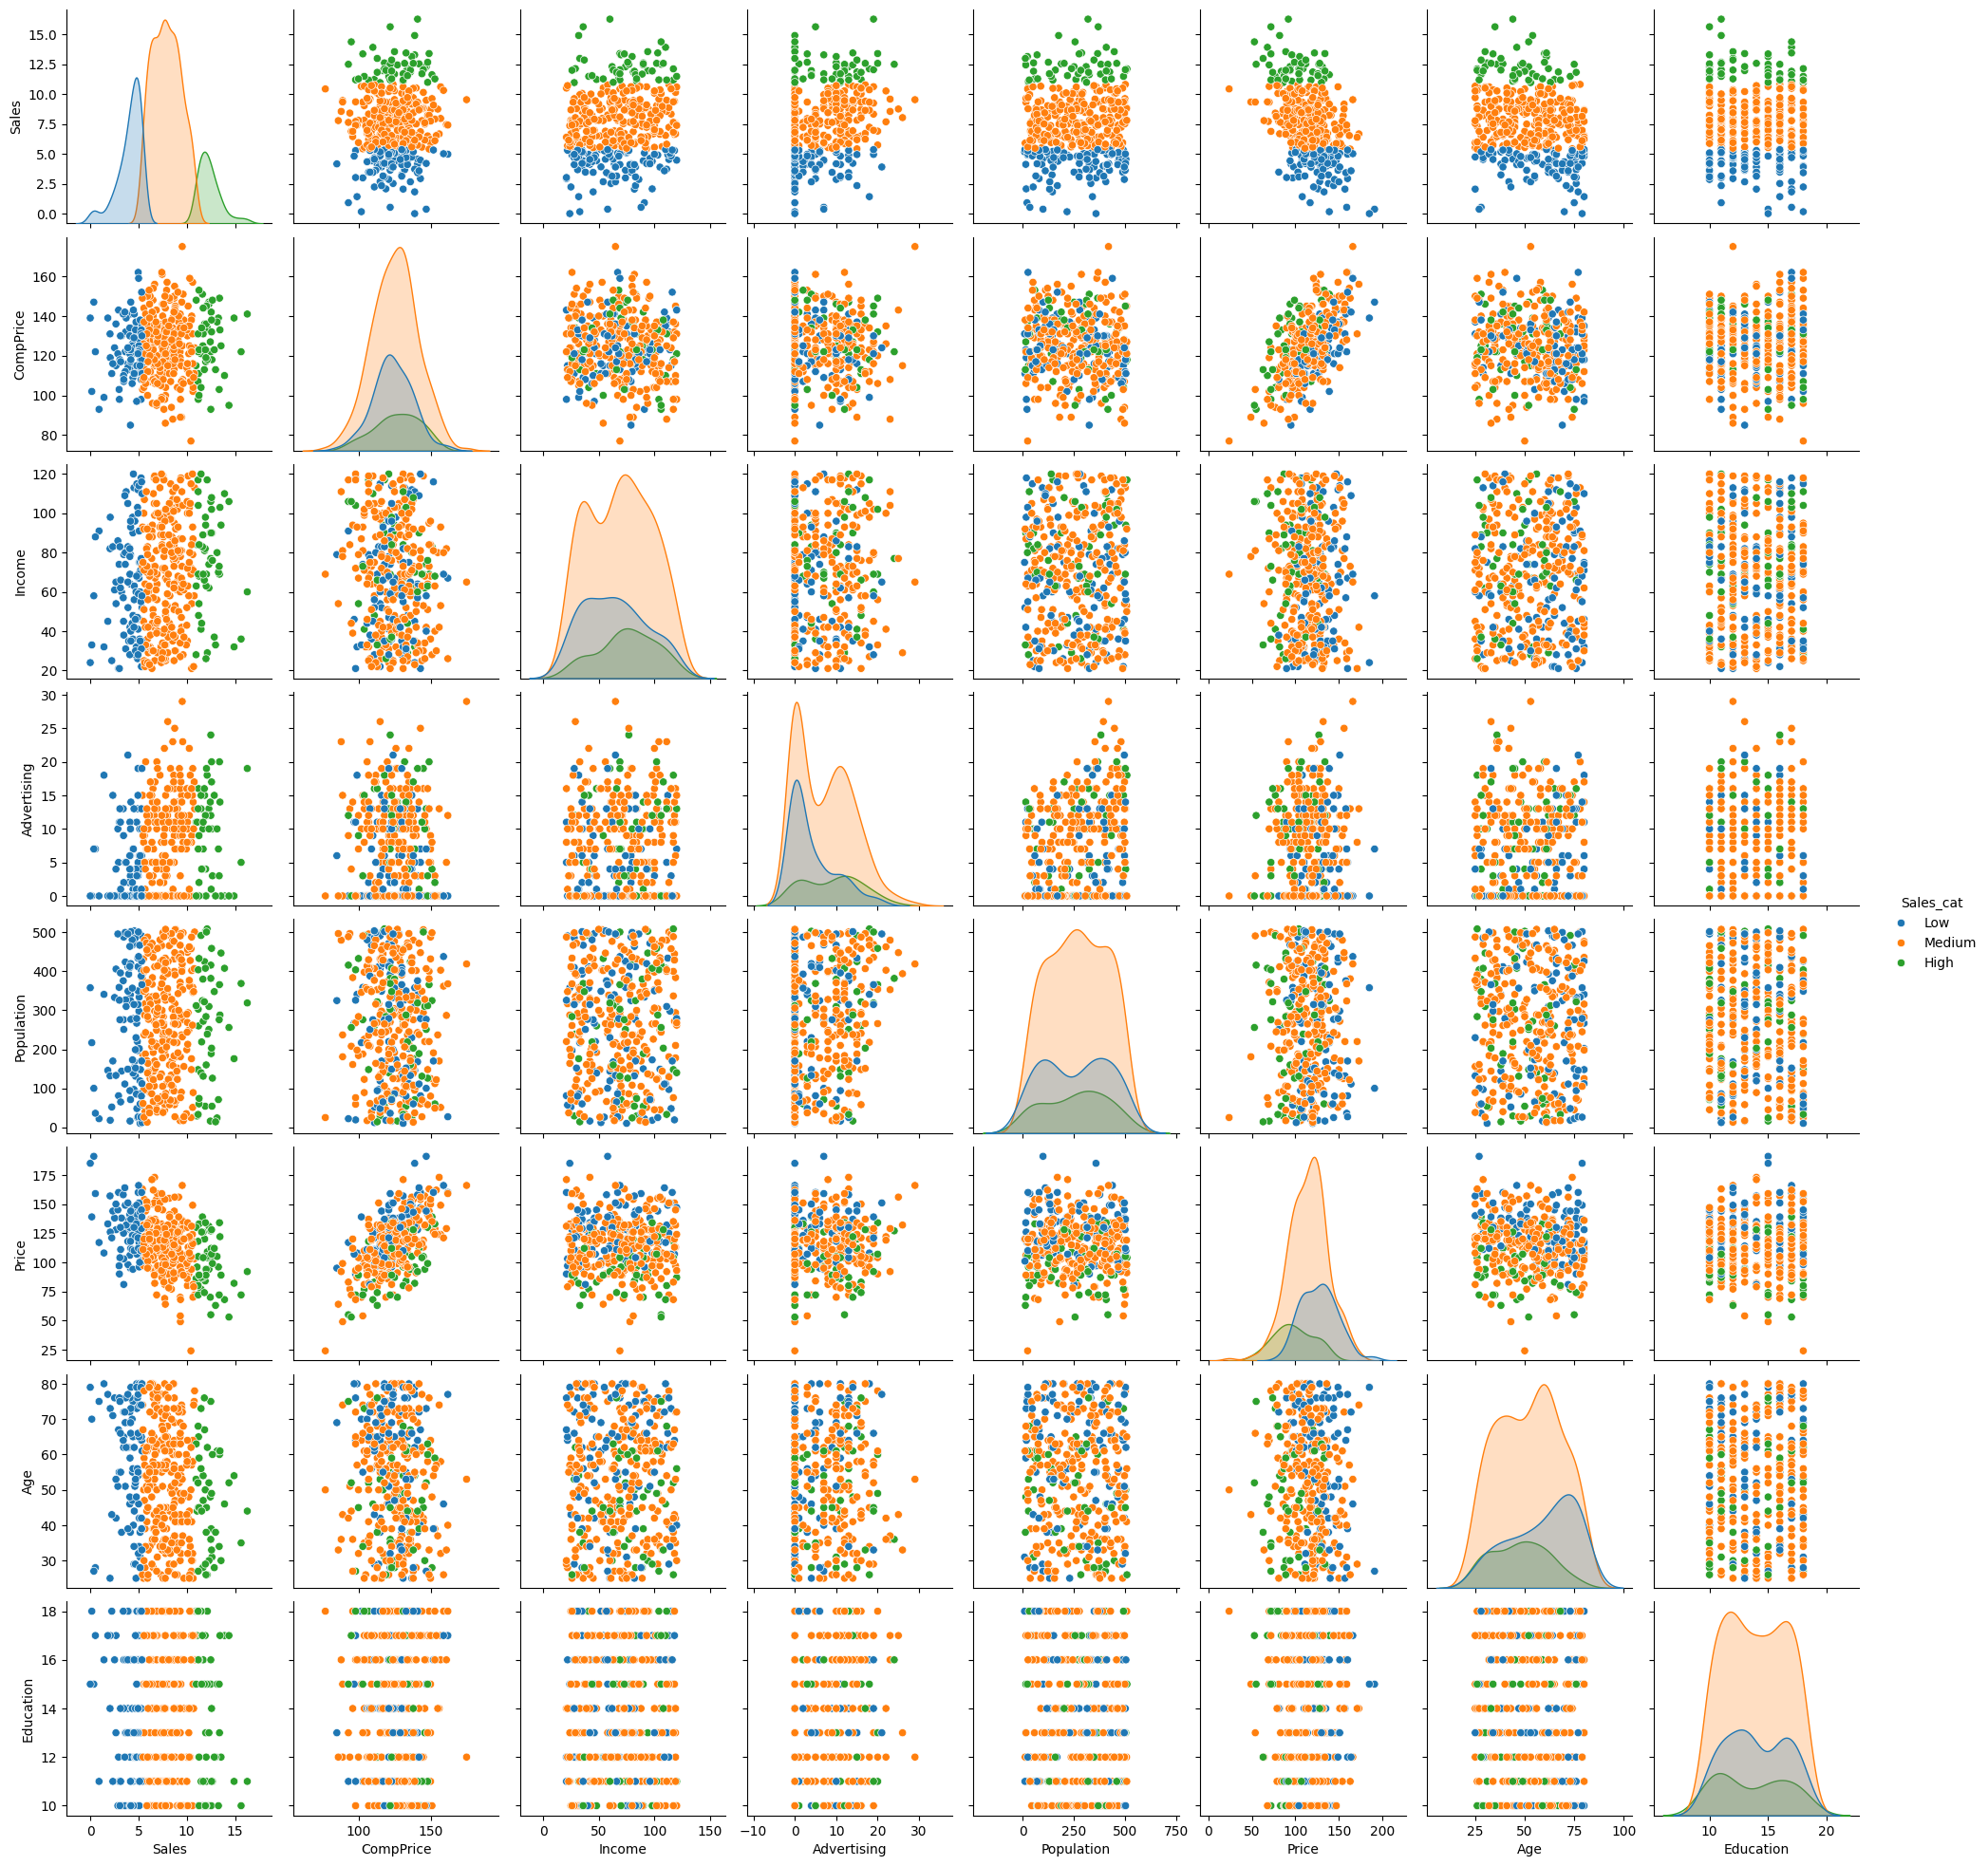

In [25]:
# let us examine all attributes using newly defined column

sns.pairplot(data = df, hue = 'Sales_cat')

Now, we shall set our data to build model. 
For that we need to get the dummy variables because there are serval categorical columns like Urban, ShelveLoc, and US.

In [26]:
df_new = df.copy()

In [27]:
df_new.drop('Sales', axis = 1, inplace = True)
df_new.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_cat
0,138,73,11,276,120,Bad,42,17,Yes,Yes,Medium
1,111,48,16,260,83,Good,65,10,Yes,Yes,High
2,113,35,10,269,80,Medium,59,12,Yes,Yes,Medium
3,117,100,4,466,97,Medium,55,14,Yes,Yes,Medium
4,141,64,3,340,128,Bad,38,13,Yes,No,Low


In [28]:
df_new = pd.get_dummies(df_new.iloc[:,:-1])
df_new.head()

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
0,138,73,11,276,120,42,17,True,False,False,False,True,False,True
1,111,48,16,260,83,65,10,False,True,False,False,True,False,True
2,113,35,10,269,80,59,12,False,False,True,False,True,False,True
3,117,100,4,466,97,55,14,False,False,True,False,True,False,True
4,141,64,3,340,128,38,13,True,False,False,False,True,True,False


# Checking for imbalance data

In [29]:
df.Sales_cat.unique()

['Medium', 'High', 'Low']
Categories (3, object): ['Low' < 'Medium' < 'High']

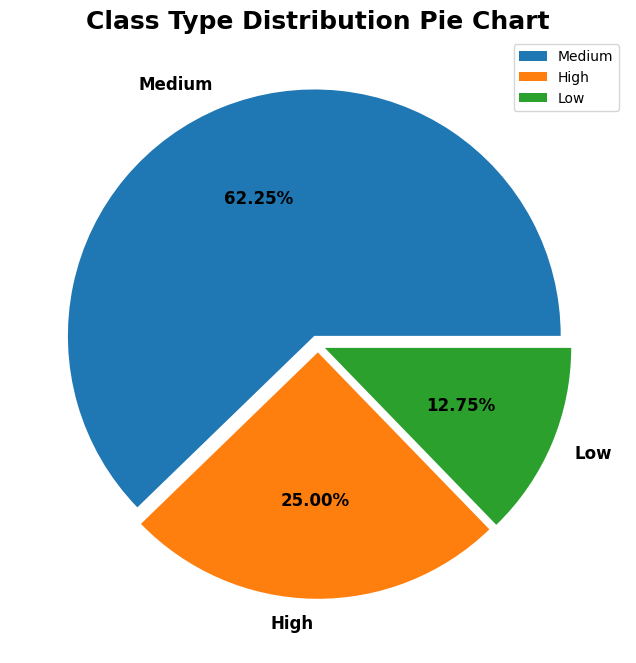

In [30]:
plt.figure(figsize = (12,8))
plt.pie(df['Sales_cat'].value_counts(),
       labels = df.Sales_cat.unique(),
       explode = [0.04, 0.03, 0.03],
       autopct = '%.2f%%',
       textprops = {'size': 'large',
                   'fontweight':'bold',
                   'rotation': 0,
                   'color':'k'})
plt.legend(loc = 'upper right')
plt.title('Class Type Distribution Pie Chart', fontsize = 18, fontweight = 'bold')
plt.show()

Now, we would try to get a balanced dataset from all this, because working with the imbalanced data would produce results which would be skewed toward a particular target class.


Before we select the balanced dataset, let us first do some feature selection. 

# Pre-processing

In [31]:
df_new.head()

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
0,138,73,11,276,120,42,17,True,False,False,False,True,False,True
1,111,48,16,260,83,65,10,False,True,False,False,True,False,True
2,113,35,10,269,80,59,12,False,False,True,False,True,False,True
3,117,100,4,466,97,55,14,False,False,True,False,True,False,True
4,141,64,3,340,128,38,13,True,False,False,False,True,True,False


In [32]:
df_new['Sales'] = df.Sales_cat
df_new.head()

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes,Sales
0,138,73,11,276,120,42,17,True,False,False,False,True,False,True,Medium
1,111,48,16,260,83,65,10,False,True,False,False,True,False,True,High
2,113,35,10,269,80,59,12,False,False,True,False,True,False,True,Medium
3,117,100,4,466,97,55,14,False,False,True,False,True,False,True,Medium
4,141,64,3,340,128,38,13,True,False,False,False,True,True,False,Low


In [33]:
from sklearn.preprocessing import LabelEncoder

In [34]:
le = LabelEncoder()
le.fit(df_new['Sales'])
df_new['Sales'] = le.transform(df_new['Sales'])

In [35]:
df_new.head()

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes,Sales
0,138,73,11,276,120,42,17,True,False,False,False,True,False,True,2
1,111,48,16,260,83,65,10,False,True,False,False,True,False,True,0
2,113,35,10,269,80,59,12,False,False,True,False,True,False,True,2
3,117,100,4,466,97,55,14,False,False,True,False,True,False,True,2
4,141,64,3,340,128,38,13,True,False,False,False,True,True,False,1


In [36]:
#split the data into input and output varibales
X = df_new.iloc[:,:-1] #will select all columns expect the end one
y = df_new.Sales

In [37]:
#feature importance 
from sklearn.feature_selection import SelectKBest, chi2

In [38]:
test = SelectKBest(score_func = chi2, k = 4)
fit = test.fit(X, y)

In [39]:
scores = fit.scores_
features = fit.transform(X)

In [40]:
score_df = pd.DataFrame(list(zip(scores, X.columns)),
                       columns = ['Score', 'Feature'])
score_df.sort_values(by = 'Score', ascending = False, inplace = True)
score_df

,Score,Feature
4,247.092470,Price
2,149.444391,Advertising
5,94.810093,Age
8,81.499432,ShelveLoc_Good
1,58.211544,Income
7,46.511536,ShelveLoc_Bad
3,25.993715,Population
9,14.943253,ShelveLoc_Medium
12,6.798861,US_No
13,3.742009,US_Yes


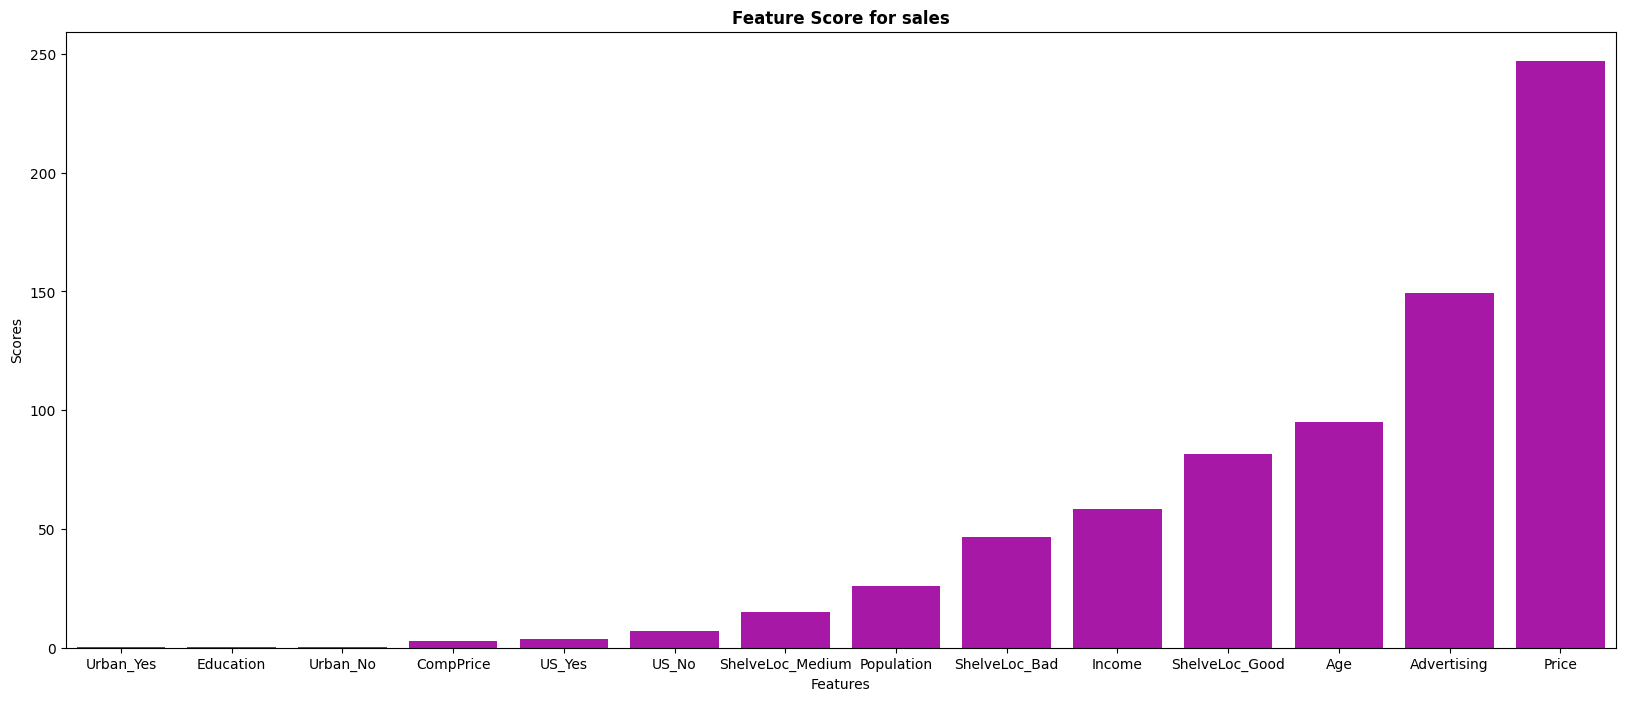

In [41]:
plt.figure(figsize = (20,8))
sns.barplot(x = 'Feature',
           y = 'Score',
           data = score_df,
           order = score_df.sort_values('Score').Feature,
           color = 'm')
plt.xlabel('Features')
plt.ylabel('Scores')
plt.title('Feature Score for sales', fontweight = 'bold')
plt.show()

Here, we can see that we can drop off certain features from the dataset because they dont contribute so much to the result or output of the result.

In [42]:
final_data = df_new[['Price','Advertising','Population','Income','Age','ShelveLoc_Good','ShelveLoc_Bad', 'ShelveLoc_Medium','Sales']]
final_data.head()

,Price,Advertising,Population,Income,Age,ShelveLoc_Good,ShelveLoc_Bad,ShelveLoc_Medium,Sales
0,120,11,276,73,42,False,True,False,2
1,83,16,260,48,65,True,False,False,0
2,80,10,269,35,59,False,False,True,2
3,97,4,466,100,55,False,False,True,2
4,128,3,340,64,38,False,True,False,1


Because the data is imbalanced we cannot just split the data into training and testing dataset, we need to make sure that equal proportion of data are available in both training and testing dataset.

In [43]:
x = final_data.drop('Sales', axis = 1)
y = final_data.Sales

In [44]:
from sklearn.model_selection import StratifiedKFold

In [45]:
skf = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 1)

In [46]:
from collections import Counter

In [47]:
for train_data, test_data in skf.split(x,y):
    train_x, test_x = x.iloc[train_data], x.loc[test_data]
    train_y, test_y = y.iloc[train_data], y.iloc[test_data]

counter_train = Counter(train_y)
counter_test = Counter(test_y)
print('Training Data', counter_train, 'Testing Data', counter_test)

Training Data Counter({2: 225, 1: 90, 0: 45}) Testing Data Counter({2: 24, 1: 10, 0: 6})


In [48]:
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(360, 8)
(360,)
(40, 8)
(40,)


In [49]:
from sklearn.model_selection import train_test_split

In [50]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 101, stratify = y)

We can try building a model using the stratified imbalanced data set first using the entropy and gini coffients. and then we can try using the SMOTE to test our DecisionTreeClassifier on a balanced data set. 

# Model building:

In [51]:
from sklearn.ensemble import RandomForestClassifier

In [54]:
model = RandomForestClassifier(n_estimators = 100)

In [55]:
model.fit(x_train, y_train)

RandomForestClassifier()

# Prediction and Evaluation

In [56]:
preds = model.predict(x_test)
pd.Series(preds).value_counts()

2    85
1    27
0     8
Name: count, dtype: int64

In [57]:
preds

array([2, 2, 2, 2, 0, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 0, 2, 1, 2, 2, 2, 2,
       1, 1, 2, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2,
       2, 1, 2, 2, 2, 2, 2, 2, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1,
       1, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2, 2, 2, 0, 0,
       2, 2, 2, 0, 2, 1, 2, 2, 2, 2])

In [58]:
pd.crosstab(y_test, preds)

col_0,0,1,2
Sales,,,
0,4,0,11
1,0,19,11
2,4,8,63


In [59]:
from sklearn.metrics import classification_report, confusion_matrix

In [60]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.50      0.27      0.35        15
           1       0.70      0.63      0.67        30
           2       0.74      0.84      0.79        75

    accuracy                           0.72       120
   macro avg       0.65      0.58      0.60       120
weighted avg       0.70      0.72      0.70       120



So, here we can see that the accuracy is 72%

In [61]:
print(confusion_matrix(y_test, preds))

[[ 4  0 11]
 [ 0 19 11]
 [ 4  8 63]]


# SMOTE
Synthetic Minority Oversampling Technique

In [62]:
from imblearn.over_sampling import SMOTE

In [63]:
counter = Counter(y_train)
print('Before',counter)

#oversampling the train dataset using SMOTE

smt = SMOTE()
x_train_sm, y_train_sm = smt.fit_resample(x_train, y_train)

counter = Counter(y_train_sm)
print('After', counter)

Before Counter({2: 174, 1: 70, 0: 36})
After Counter({2: 174, 1: 174, 0: 174})


In [65]:
model2 = RandomForestClassifier(criterion = 'entropy')

In [66]:
model2.fit(x_train_sm, y_train_sm)

RandomForestClassifier(criterion='entropy')

In [67]:
preds = model2.predict(x_test)

In [68]:
preds

array([0, 0, 2, 2, 0, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 0, 2, 1, 0, 2, 2, 2,
       1, 1, 2, 1, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2,
       2, 1, 2, 0, 1, 2, 2, 0, 0, 1, 2, 0, 2, 2, 2, 1, 2, 2, 1, 2, 1, 1,
       1, 0, 1, 0, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 2, 0, 2, 2, 1, 1, 2, 2,
       2, 1, 1, 1, 1, 1, 0, 2, 1, 2, 0, 2, 1, 2, 2, 0, 2, 2, 2, 2, 0, 0,
       2, 2, 2, 0, 1, 1, 2, 2, 2, 2])

In [69]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.45      0.60      0.51        15
           1       0.58      0.60      0.59        30
           2       0.74      0.68      0.71        75

    accuracy                           0.65       120
   macro avg       0.59      0.63      0.60       120
weighted avg       0.66      0.65      0.65       120



In [70]:
print(confusion_matrix(y_test, preds))

[[ 9  0  6]
 [ 0 18 12]
 [11 13 51]]


So now let us check the best possible parameters for the RandomForestClassifier in this case

In [71]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10,25,30,50,100,200]
}
from sklearn.model_selection import GridSearchCV
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

grid_search.fit(X, y)

print('Best Score',grid_search.best_score_)

rf_best = grid_search.best_estimator_
print(rf_best)

Fitting 4 folds for each of 180 candidates, totalling 720 fits
Best Score 0.7075
RandomForestClassifier(max_depth=10, min_samples_leaf=5, n_estimators=10,
                       n_jobs=-1, random_state=42)


In [72]:
model3 = RandomForestClassifier(max_depth=10, min_samples_leaf=5, n_estimators=10,
                       n_jobs=-1, random_state=42)

In [73]:
model3.fit(x_train_sm, y_train_sm)

RandomForestClassifier(max_depth=10, min_samples_leaf=5, n_estimators=10,
                       n_jobs=-1, random_state=42)

In [75]:
pred = model3.predict(x_test)
pred

array([0, 2, 2, 0, 0, 2, 1, 2, 2, 2, 0, 2, 2, 1, 2, 0, 2, 1, 0, 2, 1, 2,
       1, 1, 2, 1, 2, 2, 1, 0, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 0,
       2, 1, 2, 0, 2, 2, 2, 0, 0, 1, 2, 0, 2, 2, 2, 1, 2, 2, 1, 2, 1, 1,
       1, 0, 2, 0, 2, 2, 2, 2, 0, 2, 1, 1, 2, 1, 2, 0, 2, 2, 2, 2, 1, 1,
       2, 1, 1, 1, 1, 1, 0, 2, 1, 2, 0, 2, 1, 1, 2, 0, 2, 2, 2, 0, 0, 0,
       2, 2, 2, 0, 1, 1, 2, 2, 2, 2])

In [76]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.52      0.80      0.63        15
           1       0.55      0.60      0.57        30
           2       0.77      0.65      0.71        75

    accuracy                           0.66       120
   macro avg       0.61      0.68      0.64       120
weighted avg       0.68      0.66      0.66       120



In [77]:
print(confusion_matrix(y_test, pred))

[[12  0  3]
 [ 0 18 12]
 [11 15 49]]


So, there is nothing we can do more about it. 

# end of the assignment.